In [1]:
import tushare as ts
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
from sklearn.decomposition import KernelPCA 
%matplotlib inline

## Preparing Data

In [2]:
# Shanghai 50 shares codes, element stocks
symbols = ts.get_sz50s()['code'].tolist()
# adding the SSE 50 index
symbols.append('sh000016')

d:\language\python\lib\site-packages\tushare\stock\classifying.py:266: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  ct.PAGES['sz50b']), parse_cols=[0, 4, 5])


In [3]:
indexes = pd.date_range('2014-01-01', '2018-07-06', freq='B')
indexes = indexes.map(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d'))
df = pd.DataFrame(index=indexes)

# adding the all stock close price into the dataframe
for sym in symbols:
    k_d = ts.get_k_data(sym, start='2014-01-01', ktype='D')
    k_d.set_index('date', inplace=True)
    k_d = k_d.dropna()
    df[sym] = k_d['close']
# fill the nan value with the previous data
new_df = df.ffill()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1178 entries, 2014-01-01 to 2018-07-06
Data columns (total 51 columns):
600000      1177 non-null float64
600016      1177 non-null float64
600019      1177 non-null float64
600028      1177 non-null float64
600029      1177 non-null float64
600030      1177 non-null float64
600031      1177 non-null float64
600036      1177 non-null float64
600048      1177 non-null float64
600050      1177 non-null float64
600104      1177 non-null float64
600196      1177 non-null float64
600276      1177 non-null float64
600309      1177 non-null float64
600340      1177 non-null float64
600519      1177 non-null float64
600585      1177 non-null float64
600690      1177 non-null float64
600703      1177 non-null float64
600837      1177 non-null float64
600887      1177 non-null float64
601066      13 non-null float64
601088      1177 non-null float64
601111      1177 non-null float64
601138      21 non-null float64
601166      1177 non-null float64
601

In [4]:
# drop the columns which have missing value.
new_df.drop(['601066', '601138', '601211','601229','601319','603259'], axis=1, inplace=True)
new_df = new_df.dropna()
# extract the index data
sh50 = pd.DataFrame(new_df.pop('sh000016'))

## Applying PCA

In [5]:
def scale(x): return (x - x.mean()) / x.std()


# KernelPCA, step1: using kernal function to mapping into a higher dimension, step2: using PCA to reduce dimension
pca = KernelPCA().fit(new_df.apply(scale))
# the number of important eigenvalue
print(len(pca.lambdas_))
print(pca.lambdas_[:10].round())


def get_importance(x): return x / np.sum(x)


print(get_importance(pca.lambdas_)[:10])
print(get_importance(pca.lambdas_)[:6].sum())

611
[36132.  9111.  2412.  1070.   746.   389.   345.   224.   200.   170.]
[0.69828388 0.17607959 0.04661574 0.02067339 0.0144257  0.00752437
 0.00666794 0.00433564 0.00386194 0.00329189]
0.9636026738708101


## Constructing a index

### One component to constructe the index ###

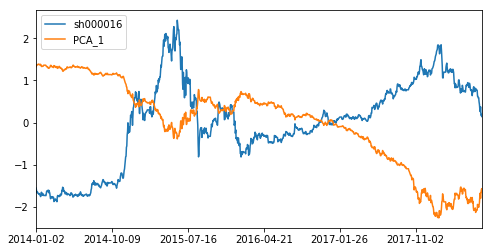

In [7]:
# Only constains one components
pca = KernelPCA(n_components=1).fit(zeta.apply(scale))
sh50['PCA_1'] = pca.transform(- zeta)

sh50.apply(scale).plot(figsize=(8, 4))

### Five components to construct index ### 

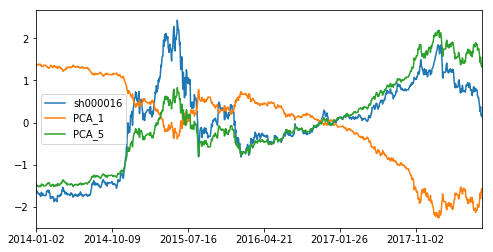

In [9]:
# Only constains one components
pca = KernelPCA(n_components=5).fit(zeta.apply(scale))
pca_components = pca.transform(zeta)
weights=get_importance(pca.lambdas_)
sh50['PCA_5']=np.dot(pca_components,weights)
sh50.apply(scale).plot(figsize=(8, 4))
plt.legend(loc='best')